# Clustering

<b> Overview </b>
- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). 

or

- Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or dissimilarity measure (such as the Euclidean distance).

In this section we will explore a basic clustering task on some synthetic and real datasets.

Here are some common applications of clustering algorithms:

- Primarily used for exploratory data analysis and business applications like customer segmentation, product segmentation, market segmentation.
- Compression, in a data reduction sense
- Can be used as a preprocessing step for recommender systems
- Similarly:
   - grouping related web news (e.g. Google News) and web search results
   - grouping related stock quotes for investment portfolio management
   - building customer profiles for market analysis
- Building a code book of prototype samples for unsupervised feature extraction

----
In this class we will explore a cluster technique called k-means & DBSCAN and understand how they works.

- Introduction to k-means() clustering
- Scaling of data before cluster analysis
- Dendogram to find out optimal number of clusters
- DBSCAN clustering

---
Can a clustering algorithm group them together by how nearer they are to each other?¶

Using K-means clustering technique
- k-mean calculates the distance between the points and the center using euclidean distance and then allocates the points to different clusters.


**Clustering comes with assumptions**: A clustering algorithm finds clusters by making assumptions with samples should be grouped together. Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal. 

> For K-means clustering, the model is that all clusters have equal, spherical variance.

**In general, there is no guarantee that structure found by a clustering algorithm has anything to do with what you were interested in**.

---

# Some Notable Clustering Routines
---

<br>

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

<br>
---
The following are few well-known clustering algorithms. 

- `sklearn.cluster.KMeans`:  <br>
    The simplest, yet effective clustering algorithm. Needs to be provided with the
    number of clusters in advance, and assumes that the data is normalized as input
    (but use a PCA model as preprocessor). <br>  



- `sklearn.cluster.MeanShift`:<br>
    Can find better looking clusters than KMeans but is not scalable to high number of samples.<br>  



- `sklearn.cluster.DBSCAN`: <br>
    Can detect irregularly shaped clusters based on density, i.e. sparse regions in
    the input space are likely to become inter-cluster boundaries. Can also detect
    outliers (samples that are not part of a cluster).<br>  



- `sklearn.cluster.AffinityPropagation`: <br>
    Clustering algorithm based on message passing between data points.<br>  



- `sklearn.cluster.SpectralClustering`: <br>
    KMeans applied to a projection of the normalized graph Laplacian: finds
    normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.<br>  



- `sklearn.cluster.Ward`: <br>
    Ward implements hierarchical clustering based on the Ward algorithm,
    a variance-minimizing approach. At each step, it minimizes the sum of
    squared differences within all clusters (inertia criterion).<br>  
    

Of these, `Ward, SpectralClustering, DBSCAN` and `Affinity Propagation` can also work with precomputed similarity matrices.

## Part 2: Clustering evaluation (Finding optimal number of clusters)

This explains how to find optimal number of clusters in a given dataset by using various techniques.
Different techniques discussed here are
- Dendogram
- Elbow method
- Silhoutte score Analysis
We will first load the data into dataframe and scale the features and create clusters. And then various metrics are calculated to validate the number of cluster creations and what will be the optimal number of clusters.

---
The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

---
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

## Using Dendogram

- Dendogram shows the distance between any two observations in a dataset. The vertical axis determines the distance. The longer the axis, the larger the distance.
- The clustermap feature in seaborn provides the dendogram. It also displays the distance between observations as well as the features. But we are mostly interested in observations.

# Elbow Analysis

- The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion"
- Given a set of observations (x1, x2, …, xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, …, Sk} so as to minimize the within-cluster sum of squares (WCSS) (sum of distance functions of each point in the cluster to the K center).
-In other words, its objective is to find: argminS∑i=1k∑x∈Si∥x−μi∥2

 

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling as pp #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10,7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

In [95]:
from sklearn.cluster import KMeans

#To standardize data
from sklearn.preprocessing import StandardScaler

In [96]:
from sklearn.decomposition import PCA

In [97]:
telco = pd.read_csv('C:/Users/abgautam/Documents/Abhishek/telco_csv.csv')

In [98]:
#To show columns and rows upto 100
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [99]:
telco.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,6,1,0,1,1,0,1,1,0,1,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,2,1,0,1,0,0,0,0,0,1,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,4,0,0,0,0,0,0,0,0,1,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [100]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
region      1000 non-null int64
tenure      1000 non-null int64
age         1000 non-null int64
marital     1000 non-null int64
address     1000 non-null int64
income      1000 non-null int64
ed          1000 non-null int64
employ      1000 non-null int64
retire      1000 non-null int64
gender      1000 non-null int64
reside      1000 non-null int64
tollfree    1000 non-null int64
equip       1000 non-null int64
callcard    1000 non-null int64
wireless    1000 non-null int64
multline    1000 non-null int64
voice       1000 non-null int64
pager       1000 non-null int64
internet    1000 non-null int64
callid      1000 non-null int64
callwait    1000 non-null int64
forward     1000 non-null int64
confer      1000 non-null int64
longmon     1000 non-null float64
tollmon     1000 non-null float64
equipmon    1000 non-null float64
cardmon     1000 non-null float64
wiremon     1000 non-n

In [101]:
telco.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,0.474000,0.386000,0.678000,0.296000,0.475000,0.304000,0.2610,0.368000,0.481000,0.485000,0.493000,0.502000,11.723100,13.274000,14.219800,13.781000,11.583900,0.371000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,0.499573,0.487074,0.467477,0.456719,0.499624,0.460213,0.4394,0.482503,0.499889,0.500025,0.500201,0.500246,10.363486,16.902122,19.068539,14.084496,19.719426,0.483314,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,8.525000,0.000000,0.000000,12.000000,0.000000,0.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,14.412500,24.250000,31.475000,20.500000,24.712500,1.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,99.950000,173.000000,77.700000,109.250000,111.950000,1.000000,4.000000


In [102]:
#Detailed profiling using pandas profiling
telco_profile_report = pp.ProfileReport(telco)

In [103]:
telco_profile_report.to_file(output_file='telco_profile_report.html')

In [104]:
numeric_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'ebill', 'custcat']
[]


In [105]:
telco_num=telco[numeric_var_names]
telco_num.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,6,1,0,1,1,0,1,1,0,1,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,2,1,0,1,0,0,0,0,0,1,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,4,0,0,0,0,0,0,0,0,1,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [106]:
telco_cat = telco[cat_var_names]
telco_cat.head(5)

""
0
1
2
3
4


In [107]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=telco_num.apply(lambda x: var_summary(x)).T

In [108]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,1000.0,0.0,2022.0,2.0220,2.000,0.816200,0.666182,1.0,1.00,1.0000,1.000,1.0,2.000,3.0000,3.000,3.0000,3.0000,3.00
tenure,1000.0,0.0,35526.0,35.5260,34.000,21.359812,456.241566,1.0,1.00,4.0000,7.000,17.0,34.000,54.0000,66.000,70.0000,72.0000,72.00
age,1000.0,0.0,41684.0,41.6840,40.000,12.558816,157.723868,18.0,20.00,23.0000,26.000,32.0,40.000,51.0000,59.000,64.0000,70.0100,77.00
marital,1000.0,0.0,495.0,0.4950,0.000,0.500225,0.250225,0.0,0.00,0.0000,0.000,0.0,0.000,1.0000,1.000,1.0000,1.0000,1.00
address,1000.0,0.0,11551.0,11.5510,9.000,10.086681,101.741140,0.0,0.00,0.0000,1.000,3.0,9.000,18.0000,26.100,31.0000,43.0000,55.00
income,1000.0,0.0,77535.0,77.5350,47.000,107.044165,11458.453228,9.0,10.99,18.0000,21.000,29.0,47.000,83.0000,155.400,232.2500,460.4800,1668.00
ed,1000.0,0.0,2671.0,2.6710,3.000,1.222397,1.494253,1.0,1.00,1.0000,1.000,2.0,3.000,4.0000,4.000,5.0000,5.0000,5.00
employ,1000.0,0.0,10987.0,10.9870,8.000,10.082087,101.648479,0.0,0.00,0.0000,0.000,3.0,8.000,17.0000,25.000,31.0000,40.0100,47.00
retire,1000.0,0.0,47.0,0.0470,0.000,0.211745,0.044836,0.0,0.00,0.0000,0.000,0.0,0.000,0.0000,0.000,0.0000,1.0000,1.00
gender,1000.0,0.0,517.0,0.5170,1.000,0.499961,0.249961,0.0,0.00,0.0000,0.000,0.0,1.000,1.0000,1.000,1.0000,1.0000,1.00


In [109]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

telco_num=telco_num.apply(lambda x: outlier_capping(x))

In [110]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

telco_num=telco_num.apply(lambda x: Missing_imputation(x))

In [111]:
telco_num.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
region,1.000000,0.016388,0.012903,-0.080637,0.009533,0.023223,-0.057952,0.016618,0.005595,0.050596,-0.062677,0.025953,-0.016346,0.008091,-0.006745,-0.033015,-0.015158,0.000720,-0.000244,0.018199,0.010620,0.017541,-0.017269,0.001482,0.020740,-0.014371,-0.005019,0.009639,0.030039,-0.023771
tenure,0.016388,1.000000,0.490613,0.154171,0.523968,0.290927,-0.109797,0.520351,0.171143,0.023533,-0.034806,0.068731,-0.153177,0.462182,0.003007,0.409630,-0.005591,-0.020721,-0.140888,0.058311,0.086777,0.085884,0.133585,0.755250,0.239342,-0.064180,0.445672,0.095382,-0.157095,0.166691
age,0.012903,0.490613,1.000000,-0.011957,0.658073,0.388719,-0.154199,0.671798,0.419562,-0.013114,-0.255995,0.094614,-0.171363,0.280079,-0.007921,0.125595,-0.030625,-0.054286,-0.139855,0.082556,0.074877,0.082868,0.122958,0.409538,0.184097,-0.126281,0.288360,0.039280,-0.144105,0.059187
marital,-0.080637,0.154171,-0.011957,1.000000,-0.010709,-0.021195,0.001400,-0.001556,-0.078109,0.008345,0.631310,0.013499,-0.000288,0.057318,0.032773,0.091619,0.019654,0.044654,0.024220,0.035648,0.023712,0.043866,0.006040,0.132886,0.063841,0.013961,0.107968,0.051942,-0.056495,0.083836
address,0.009533,0.523968,0.658073,-0.010709,1.000000,0.255677,-0.127278,0.459372,0.282156,0.006453,-0.202920,0.068981,-0.152558,0.258250,-0.035126,0.156613,-0.052115,-0.054958,-0.130435,0.034894,0.058743,0.080751,0.089632,0.471009,0.163823,-0.115242,0.275419,0.014713,-0.130124,0.069913
income,0.023223,0.290927,0.388719,-0.021195,0.255677,1.000000,0.124024,0.609636,-0.103679,0.040286,-0.102222,0.150131,-0.028864,0.184394,0.114072,0.110432,0.126405,0.140025,-0.021190,0.172393,0.144545,0.143558,0.174063,0.244525,0.208104,0.014707,0.169074,0.154315,-0.029922,0.171062
ed,-0.057952,-0.109797,-0.154199,0.001400,-0.127278,0.124024,1.000000,-0.227449,-0.114229,0.006704,0.021049,0.029416,0.443835,-0.064705,0.321630,0.265969,0.309637,0.301666,0.460052,0.031532,0.014027,0.029790,0.016628,-0.094830,-0.009181,0.462110,-0.065124,0.320090,0.405040,0.193864
employ,0.016618,0.520351,0.671798,-0.001556,0.459372,0.609636,-0.227449,1.000000,0.273281,0.044054,-0.134581,0.143141,-0.203887,0.293218,-0.011984,0.119225,-0.030786,-0.015814,-0.198302,0.143722,0.151557,0.116052,0.168114,0.464180,0.247376,-0.161682,0.287433,0.037884,-0.181322,0.110760
retire,0.005595,0.171143,0.419562,-0.078109,0.282156,-0.103679,-0.114229,0.273281,1.000000,0.053906,-0.141332,0.044684,-0.108141,0.092368,-0.040492,0.025311,-0.054319,-0.056666,-0.120472,0.032087,0.049210,0.036188,0.060538,0.256609,0.092848,-0.093175,0.111980,-0.026163,-0.082524,0.008908
gender,0.050596,0.023533,-0.013114,0.008345,0.006453,0.040286,0.006704,0.044054,0.053906,1.000000,0.015622,-0.016263,-0.002310,0.002030,-0.000140,0.021740,0.016671,-0.031609,0.019685,0.001294,-0.031012,-0.035548,-0.002137,0.005925,0.000980,0.001961,-0.023430,0.011810,-0.015771,-0.004966


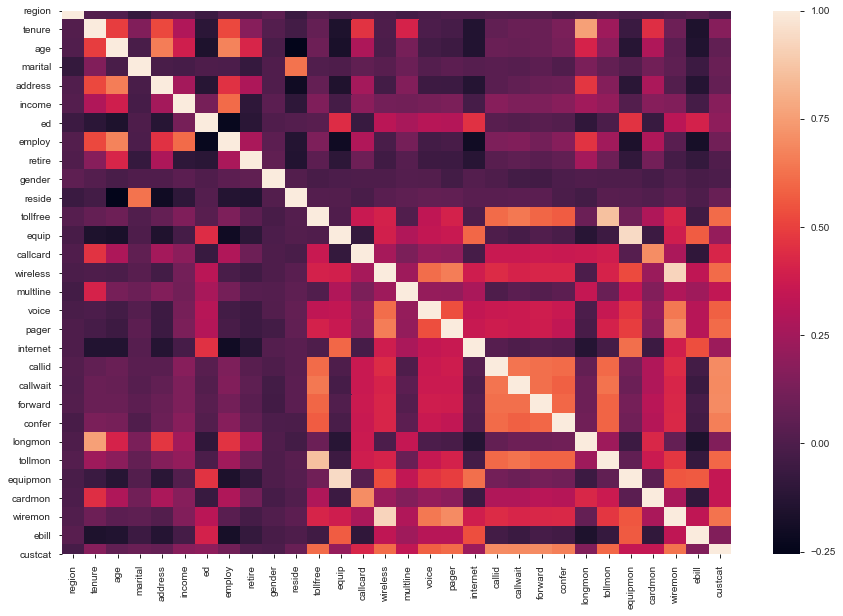

In [112]:
# visualize correlation matrix in Seaborn using a heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(telco_num.corr())

### Standardrizing data 
- To put data on the same scale 
- Z(X) = (X-mean(X))/std(X)

In [113]:
telco_num.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'ebill', 'custcat'], dtype='object')

In [114]:
#drop some variables looks numerical nature but they are not numerical (eg: Region, Custcat)

telco_num.drop(['region', 'custcat'], axis=1, inplace=True)

In [115]:
telco_num.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'ebill'], dtype='object')

In [116]:
sc=StandardScaler()
#sc.fit() - Calculate mean and std and remember that 
#sc.transform() - it transform variable (X to Z(X))

telco_scaled=sc.fit_transform(telco_num) #It will do both ahings together (fit and transform)

In [117]:
pd.DataFrame(telco_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-1.055125,0.189446,1.010051,-0.252674,-0.126231,1.087753,-0.597197,-0.222076,-1.034598,-0.229045,-0.949284,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,-0.594289,-0.763072,-0.962695,-0.970437,1.014099,-1.004008,-0.835868,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001
1,-1.148806,-0.695476,1.010051,-0.453208,0.802534,1.906227,-0.597197,-0.222076,-1.034598,2.607427,1.053425,-0.792884,0.689149,1.542199,-0.95119,1.513101,1.682682,-0.763072,1.038750,1.030464,1.014099,0.996008,-0.761419,0.484856,-0.749071,0.121006,1.275872,-0.768001
2,1.521092,0.833025,1.010051,1.251336,0.544543,-1.367671,1.811218,-0.222076,0.966559,-0.229045,1.053425,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,-0.594289,-0.763072,1.038750,1.030464,-0.986097,0.996008,0.700982,0.311301,-0.749071,1.240918,-0.598794,-0.768001
3,-0.118319,-0.695476,-0.990050,0.048128,-0.526115,-0.549196,-1.098950,-0.222076,0.966559,-0.938163,-0.949284,-0.792884,-1.451065,-0.648425,-0.95119,-0.660895,-0.594289,-0.763072,-0.962695,-0.970437,-0.986097,-1.004008,-0.224319,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
4,-0.586722,-0.936819,1.010051,-0.252674,-0.564814,-1.367671,-0.898249,-0.222076,-1.034598,1.189191,-0.949284,-0.792884,-1.451065,-0.648425,-0.95119,-0.660895,-0.594289,-0.763072,1.038750,-0.970437,1.014099,0.996008,-0.559342,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001


In [118]:
#For standardized data mean will be 0 and std will be 1
#We are checking using describe(), whther for standardized data mean is 0 and st is 1 or not
#In below ouput, mean is 0 and std is 1, so data is standardized
pd.DataFrame(telco_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.512124e-16,3.602674e-17,3.996803e-17,4.796163e-17,4.113376e-17,1.661449e-16,1.335598e-16,3.025358e-16,-2.111644e-16,-1.275091e-16,5.364598e-16,-2.933209e-16,-1.045830e-16,-2.160494e-16,-1.763034e-16,4.851675e-17,1.920686e-16,1.385558e-16,-2.176037e-17,2.331468e-18,-5.118128e-17,-2.153833e-17,-7.077672e-18,7.649437e-17,-2.380318e-16,-9.711676e-17,-2.975398e-17,2.264855e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.617209e+00,-1.741293e+00,-9.900495e-01,-1.155079e+00,-8.100333e-01,-1.367671e+00,-1.098950e+00,-2.220764e-01,-1.034598e+00,-9.381632e-01,-9.492843e-01,-7.928837e-01,-1.451065e+00,-6.484247e-01,-9.511897e-01,-6.608946e-01,-5.942895e-01,-7.630717e-01,-9.626953e-01,-9.704368e-01,-9.860966e-01,-1.004008e+00,-1.053899e+00,-8.246952e-01,-7.490708e-01,-1.017571e+00,-5.987943e-01,-7.680007e-01
25%,-8.677637e-01,-7.759238e-01,-9.900495e-01,-8.542771e-01,-5.777133e-01,-5.491964e-01,-7.978979e-01,-2.220764e-01,-1.034598e+00,-9.381632e-01,-9.492843e-01,-7.928837e-01,-1.451065e+00,-6.484247e-01,-9.511897e-01,-6.608946e-01,-5.942895e-01,-7.630717e-01,-9.626953e-01,-9.704368e-01,-9.860966e-01,-1.004008e+00,-6.763338e-01,-8.246952e-01,-7.490708e-01,-1.017571e+00,-5.987943e-01,-7.680007e-01
50%,-7.147832e-02,-1.323441e-01,-9.900495e-01,-2.526735e-01,-3.455222e-01,2.692781e-01,-2.961447e-01,-2.220764e-01,9.665588e-01,-2.290451e-01,-9.492843e-01,-7.928837e-01,6.891489e-01,-6.484247e-01,-9.511897e-01,-6.608946e-01,-5.942895e-01,-7.630717e-01,-9.626953e-01,-9.704368e-01,-9.860966e-01,9.960080e-01,-3.226987e-01,-8.246952e-01,-7.490708e-01,-1.216411e-01,-5.987943e-01,-7.680007e-01
75%,8.653280e-01,7.525780e-01,1.010051e+00,6.497319e-01,1.188599e-01,1.087753e+00,6.070109e-01,-2.220764e-01,9.665588e-01,4.800729e-01,1.053425e+00,1.261219e+00,6.891489e-01,1.542199e+00,1.051315e+00,1.513101e+00,1.682682e+00,1.310493e+00,1.038750e+00,1.030464e+00,1.014099e+00,9.960080e-01,3.034748e-01,7.057438e-01,9.151374e-01,5.129756e-01,6.988998e-01,1.302082e+00
max,1.708454e+00,2.281884e+00,1.010051e+00,3.156414e+00,4.988164e+00,1.906227e+00,2.916079e+00,4.502954e+00,9.665588e-01,2.607427e+00,1.053425e+00,1.261219e+00,6.891489e-01,1.542199e+00,1.051315e+00,1.513101e+00,1.682682e+00,1.310493e+00,1.038750e+00,1.030464e+00,1.014099e+00,9.960080e-01,4.292373e+00,3.183793e+00,2.500299e+00,3.611398e+00,2.988408e+00,1.302082e+00


## Applying PCA

In [119]:
pc = PCA(n_components=28)

In [120]:
pc.fit(telco_scaled)

PCA(copy=True, iterated_power='auto', n_components=28, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [121]:
#Eigen values
#Individual component should explain at least 0.8(eigen value) 
#Variables having eigen values >=0.8 can be selected and rest can be drop off
pc.explained_variance_

array([6.66244068, 4.91326268, 2.87933837, 1.80304708, 1.2109082 ,
       1.08062741, 0.99708147, 0.86501531, 0.79050289, 0.68337533,
       0.6109398 , 0.58922782, 0.54240372, 0.48141267, 0.45938891,
       0.43754823, 0.42668323, 0.38936756, 0.36180249, 0.35410928,
       0.33468637, 0.30274398, 0.24838842, 0.20014787, 0.19315674,
       0.11451467, 0.0687937 , 0.02711315])

In [122]:
#Eigen values - each standardized variable contributes std = 1 , so Sum of Eigen values should be almost = count of variables
#Total number of variables are 28, so sum of eigen values is coming close to 28
sum(pc.explained_variance_)

28.02802802802803

In [123]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

In [124]:
var

array([0.23770637, 0.17529819, 0.10273068, 0.06433014, 0.04320347,
       0.03855524, 0.03557444, 0.03086251, 0.02820401, 0.02438186,
       0.02179746, 0.02102281, 0.01935219, 0.01717612, 0.01639034,
       0.0156111 , 0.01522345, 0.01389208, 0.0129086 , 0.01263411,
       0.01194113, 0.01080147, 0.00886214, 0.00714099, 0.00689156,
       0.00408572, 0.00245446, 0.00096736])

In [125]:
#Cumulative Variance explains
# If commulative sum of %age is >=75% then those variables can be selected and rest can be ignored
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [126]:
var1

array([ 23.77,  41.3 ,  51.57,  58.  ,  62.32,  66.18,  69.74,  72.83,
        75.65,  78.09,  80.27,  82.37,  84.31,  86.03,  87.67,  89.23,
        90.75,  92.14,  93.43,  94.69,  95.88,  96.96,  97.85,  98.56,
        99.25,  99.66,  99.91, 100.01])

#### Number of components selected are 9 based on cumulative variance which is explaining >75 % and individual component explaining >0.8 variance


#### Now we will re-run PCA test again for finalized components (which is 9)

In [127]:
pc_final=PCA(n_components=9).fit(telco_scaled)

In [128]:
pc_final.explained_variance_

array([6.66244068, 4.91326268, 2.87933836, 1.80304556, 1.21089789,
       1.08046461, 0.99703834, 0.86492003, 0.78890715])

#### The output calculated below are Factors (F1, F2, ...F9) or Prinicpal Component (PC1, PC2...PC9)

In [129]:
reduced_cr=pc_final.fit_transform(telco_scaled)

In [130]:
dimensions = pd.DataFrame(reduced_cr)

In [131]:
dimensions.columns = ['C1','C2','C3','C4','C5','C6','C7','C8','C9']

In [132]:
dimensions.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,-2.304547,0.054401,-0.795825,0.374116,0.182117,-0.702418,0.912062,0.883682,0.120606
1,2.878863,-0.970357,-2.912298,1.740815,1.378628,-0.032218,1.052253,1.091480,-1.313139
2,0.627665,3.970825,-0.273995,0.554210,0.661064,0.182152,-0.763689,0.456732,1.115356
3,-3.614707,-0.087751,-0.486451,-1.037905,-0.158310,0.130898,-1.048666,-0.239546,-1.118274
4,-2.120435,0.041304,-2.498295,1.167793,0.249279,0.495268,1.352879,0.082401,-0.202893


#### Factor Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components(Principal Component which is C1,C2...C9 in this model).

In [133]:
#pc_final.components_
#print pd.DataFrame(pc_final.components_,columns=telco_num.columns).T
loadings = pd.DataFrame((pc_final.components_.T*np.sqrt(pc_final.explained_variance_)).T, columns=telco_num.columns).T

In [134]:
loadings.columns = ['C1','C2','C3','C4','C5','C6','C7','C8','C9']

In [135]:
loadings.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9
tenure,0.282763,0.602717,0.502956,0.252013,-0.079817,-0.129304,-0.069276,-0.181071,-0.084659
age,0.212464,0.627202,0.428618,-0.238001,0.093645,0.230937,0.190691,0.181196,0.057910
marital,0.078174,0.020595,0.003065,0.828003,0.165666,0.259203,0.169336,0.115869,0.084476
address,0.178138,0.573757,0.427719,-0.132239,-0.038818,0.138771,0.133081,0.013851,0.022515
income,0.308325,0.303485,0.269622,-0.152043,0.743785,-0.177122,-0.017594,0.061910,0.072119


In [136]:
loadings.to_csv("loadings1.csv")

#### Higher the value in above matrix between variable and Component (C1, C2...), more important is that variable for that component.
    - We can select variable having value 0.5 and above
    - We can select variable having value -0.5 and less

#### We highlighted variables having strong corelation with principal components.
    - variables having values >=0.5 and <=-0.5 are highlighted

<img src="C:/Users/abgautam/Documents/Abhishek/OneDrive_1_11-7-2019/DS/Assignment/Class 20-21 Files/Segmentation/1. Segmentation - Telecom - Class/PCA_Variable_Corelation.PNG">

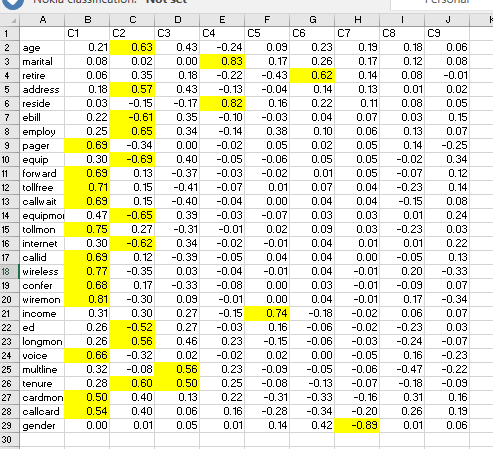

#### Sorted variables under individual principal components and highlighted according to them in below image:

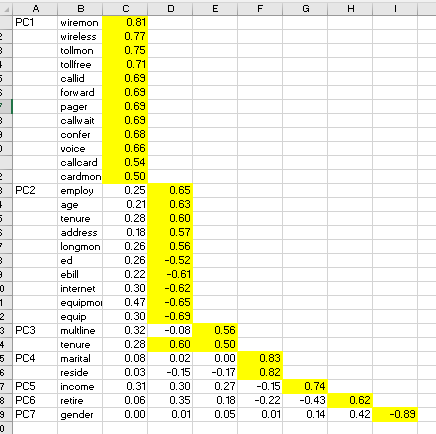

# Clustering

### selected the list variables from PCA based on factor loading matrix
    - First two PCs are most important and having maximum variance ratio, so will select more variables from them           and then can select less number of variables from rest of PCs
    - In PC1, wiremon & wireless are from same family and tollmon and tollfree are from same family, so selected             1-1 from them which are wiremon & tollmon. From rest selected callcard

In [137]:
list_var = ['wiremon','tollmon','callcard','employ','tenure','multline','income','retire','gender','marital']

In [138]:
telco_scaled1=pd.DataFrame(telco_scaled, columns=telco_num.columns)
telco_scaled1.head(5)

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill
0,-1.055125,0.189446,1.010051,-0.252674,-0.126231,1.087753,-0.597197,-0.222076,-1.034598,-0.229045,-0.949284,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,-0.594289,-0.763072,-0.962695,-0.970437,1.014099,-1.004008,-0.835868,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001
1,-1.148806,-0.695476,1.010051,-0.453208,0.802534,1.906227,-0.597197,-0.222076,-1.034598,2.607427,1.053425,-0.792884,0.689149,1.542199,-0.95119,1.513101,1.682682,-0.763072,1.038750,1.030464,1.014099,0.996008,-0.761419,0.484856,-0.749071,0.121006,1.275872,-0.768001
2,1.521092,0.833025,1.010051,1.251336,0.544543,-1.367671,1.811218,-0.222076,0.966559,-0.229045,1.053425,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,-0.594289,-0.763072,1.038750,1.030464,-0.986097,0.996008,0.700982,0.311301,-0.749071,1.240918,-0.598794,-0.768001
3,-0.118319,-0.695476,-0.990050,0.048128,-0.526115,-0.549196,-1.098950,-0.222076,0.966559,-0.938163,-0.949284,-0.792884,-1.451065,-0.648425,-0.95119,-0.660895,-0.594289,-0.763072,-0.962695,-0.970437,-0.986097,-1.004008,-0.224319,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
4,-0.586722,-0.936819,1.010051,-0.252674,-0.564814,-1.367671,-0.898249,-0.222076,-1.034598,1.189191,-0.949284,-0.792884,-1.451065,-0.648425,-0.95119,-0.660895,-0.594289,-0.763072,1.038750,-0.970437,1.014099,0.996008,-0.559342,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001


In [139]:
telco_scaled2=telco_scaled1[list_var]
telco_scaled2.head(5)

,wiremon,tollmon,callcard,employ,tenure,multline,income,retire,gender,marital
0,-0.598794,-0.824695,0.689149,-0.597197,-1.055125,-0.95119,-0.126231,-0.222076,-1.034598,1.010051
1,1.275872,0.484856,0.689149,-0.597197,-1.148806,-0.95119,0.802534,-0.222076,-1.034598,1.010051
2,-0.598794,0.311301,0.689149,1.811218,1.521092,-0.95119,0.544543,-0.222076,0.966559,1.010051
3,-0.598794,-0.824695,-1.451065,-1.098950,-0.118319,-0.95119,-0.526115,-0.222076,0.966559,-0.990050
4,-0.598794,-0.824695,-1.451065,-0.898249,-0.586722,-0.95119,-0.564814,-0.222076,-1.034598,1.010051


# Segmentation

In [140]:
KMeans?

In [141]:
km_3=KMeans(n_clusters=3, random_state=123)

In [142]:
km_3.fit(telco_scaled2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [143]:
#All observations get labels. 
#We have defined Kmeans for 3 segmentation, so all observation got classified into 3 segments which is 0,1,2
km_3.labels_

array([1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1,
       2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0,

In [144]:
#It gives centroid
#Three centroids for 10 variables as we are taking Kmeans = 3
km_3.cluster_centers_

array([[-0.11780991,  0.41809243,  0.41593012,  1.23057267,  0.77065079,
         0.11397234, -0.46685987,  4.50295411,  0.24273609, -0.35171971],
       [-0.31136843, -0.37454471, -0.55315924, -0.52452894, -0.65303407,
        -0.41028329, -0.38147772, -0.22207644, -0.0263524 , -0.03981042],
       [ 0.38995682,  0.40803247,  0.62459491,  0.50108397,  0.70687517,
         0.48448069,  0.51293221, -0.22207644,  0.0054463 ,  0.08657045]])

In [145]:
km_4=KMeans(n_clusters=4,random_state=123).fit(telco_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(telco_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(telco_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(telco_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(telco_scaled2)
#km_5.labels_

In [146]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
telco_num['cluster_3'] = km_3.labels_
telco_num['cluster_4'] = km_4.labels_
telco_num['cluster_5'] = km_5.labels_
telco_num['cluster_6'] = km_6.labels_
telco_num['cluster_7'] = km_7.labels_
telco_num['cluster_8'] = km_8.labels_

In [147]:
telco_num.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,13,44.0,1,9,64.0,4,5.0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1,2,3,0,0,7
1,11,33.0,1,7,136.0,5,5.0,0,0,6,1,0,1,1,0,1,1,0,1,1,1,1,4.40,20.75,0.0,15.25,35.7,0,1,2,3,0,0,7
2,68,52.0,1,24,116.0,1,29.0,0,1,2,1,0,1,0,0,0,0,0,1,1,0,1,18.15,18.00,0.0,30.25,0.0,0,2,3,4,5,6,2
3,33,33.0,0,12,33.0,2,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1,1,0,1,2,6
4,23,30.0,1,9,30.0,1,2.0,0,0,4,0,0,0,0,0,0,0,0,1,0,1,1,6.30,0.00,0.0,0.00,0.0,0,1,1,0,1,5,1


In [148]:
pd.Series(km_3.labels_).value_counts()

1    522
2    431
0     47
dtype: int64

#### For best practice, segmentation should be within range of 4% to 40%

In [149]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

1    0.522
2    0.431
0    0.047
dtype: float64

In [150]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

1    0.299
0    0.249
5    0.191
3    0.143
2    0.071
4    0.047
dtype: float64

### Choosing number of clusters using Silhouette Coefficient

In [151]:
#Calculate silhouette score for k=3
from sklearn import metrics
metrics.silhouette_score(telco_scaled2, km_3.labels_)

0.19544205668977482

In [152]:
#Calculate SC for K=3 to K=8
k_range = range(3,9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(telco_scaled2)
    scores.append(metrics.silhouette_score(telco_scaled2,km.labels_))

In [153]:
scores

[0.19544205668977482,
 0.17431852549299548,
 0.18999631536884978,
 0.200134110038064,
 0.19267918888581145,
 0.19991014905742557]

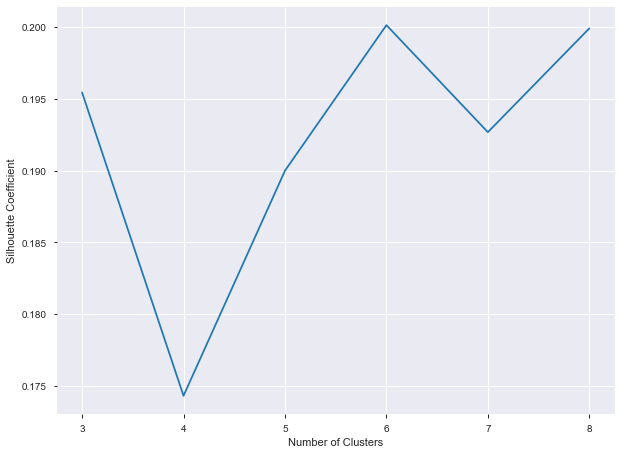

In [154]:
#Plot results
plt.plot(k_range,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### Note

The solution can be 6, 8 based on the SC score. If we take highest SC score, 6 segment solution is the best

### Segment Distribution

In [155]:
telco_num.cluster_6.value_counts()/sum(telco_num.cluster_6.value_counts())

1    0.299
0    0.249
5    0.191
3    0.143
2    0.071
4    0.047
Name: cluster_6, dtype: float64

##### In above metrics, segmentation also lies between 4% to 40%

# Profiling

In [156]:
telco_num.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,13,44.0,1,9,64.0,4,5.0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1,2,3,0,0,7
1,11,33.0,1,7,136.0,5,5.0,0,0,6,1,0,1,1,0,1,1,0,1,1,1,1,4.40,20.75,0.0,15.25,35.7,0,1,2,3,0,0,7
2,68,52.0,1,24,116.0,1,29.0,0,1,2,1,0,1,0,0,0,0,0,1,1,0,1,18.15,18.00,0.0,30.25,0.0,0,2,3,4,5,6,2
3,33,33.0,0,12,33.0,2,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1,1,0,1,2,6
4,23,30.0,1,9,30.0,1,2.0,0,0,4,0,0,0,0,0,0,0,0,1,0,1,1,6.30,0.00,0.0,0.00,0.0,0,1,1,0,1,5,1


In [157]:
telco_num.cluster_3.value_counts()/1000

1    0.522
2    0.431
0    0.047
Name: cluster_3, dtype: float64

In [158]:
telco_num.cluster_3.value_counts()*100/sum(telco_num.cluster_3.value_counts())

1    52.2
2    43.1
0     4.7
Name: cluster_3, dtype: float64

In [159]:
pd.Series.sort_index(telco_num.cluster_3.value_counts())

0     47
1    522
2    431
Name: cluster_3, dtype: int64

In [160]:
telco_num.cluster_3.size

1000

In [161]:
size=pd.concat([pd.Series(telco_num.cluster_3.size), pd.Series.sort_index(telco_num.cluster_3.value_counts()),
               pd.Series.sort_index(telco_num.cluster_4.value_counts()), pd.Series.sort_index(telco_num.cluster_5.value_counts()),
               pd.Series.sort_index(telco_num.cluster_6.value_counts()), pd.Series.sort_index(telco_num.cluster_7.value_counts()),
               pd.Series.sort_index(telco_num.cluster_8.value_counts())])

In [162]:
size

0    1000
0      47
1     522
2     431
0      47
1     309
2     443
3     201
0     302
1      47
2     280
3     266
4     105
0     249
1     299
2      71
3     143
4      47
5     191
0     242
1     186
2     157
3      47
4     141
5     148
6      79
0     128
1     147
2     178
3      47
4      57
5     136
6     157
7     150
dtype: int64

In [163]:
Seg_size = pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/telco_num.cluster_3.size, columns=['Seg_Pct'])

In [164]:
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Seg_size,1000,47,522,431,47,309,443,201,302,47,280,266,105,249,299,71,143,47,191,242,186,157,47,141,148,79,128,147,178,47,57,136,157,150


In [165]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.047,0.522,0.431,0.047,0.309,0.443,0.201,0.302,0.047,0.28,0.266,0.105,0.249,0.299,0.071,0.143,0.047,0.191,0.242,0.186,0.157,0.047,0.141,0.148,0.079,0.128,0.147,0.178,0.047,0.057,0.136,0.157,0.15


In [166]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.0,47.000,522.000,431.000,47.000,309.000,443.000,201.000,302.000,47.000,280.00,266.000,105.000,249.000,299.000,71.000,143.000,47.000,191.000,242.000,186.000,157.000,47.000,141.000,148.000,79.000,128.000,147.000,178.000,47.000,57.000,136.000,157.000,150.00
Seg_Pct,1.0,0.047,0.522,0.431,0.047,0.309,0.443,0.201,0.302,0.047,0.28,0.266,0.105,0.249,0.299,0.071,0.143,0.047,0.191,0.242,0.186,0.157,0.047,0.141,0.148,0.079,0.128,0.147,0.178,0.047,0.057,0.136,0.157,0.15


In [167]:
telco_num.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,13,44.0,1,9,64.0,4,5.0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1,2,3,0,0,7
1,11,33.0,1,7,136.0,5,5.0,0,0,6,1,0,1,1,0,1,1,0,1,1,1,1,4.40,20.75,0.0,15.25,35.7,0,1,2,3,0,0,7
2,68,52.0,1,24,116.0,1,29.0,0,1,2,1,0,1,0,0,0,0,0,1,1,0,1,18.15,18.00,0.0,30.25,0.0,0,2,3,4,5,6,2
3,33,33.0,0,12,33.0,2,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1,1,0,1,2,6
4,23,30.0,1,9,30.0,1,2.0,0,0,4,0,0,0,0,0,0,0,0,1,0,1,1,6.30,0.00,0.0,0.00,0.0,0,1,1,0,1,5,1


In [168]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([telco_num.apply(lambda x: x.mean()).T, telco_num.groupby('cluster_3').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_5').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_7').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [169]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
tenure,35.526000,51.978723,21.584291,50.617169,51.978723,20.728155,35.934537,53.527363,20.271523,51.978723,48.646429,29.763158,51.647619,27.931727,20.130435,49.563380,42.412587,51.978723,55.104712,27.512397,54.833333,19.407643,51.978723,42.475177,21.614865,50.518987,28.054688,21.673469,56.146067,51.978723,51.245614,44.022059,19.617834,28.826667
age,41.645100,65.129574,35.591954,46.415336,65.129574,35.702265,39.327336,50.398010,35.301325,65.129574,42.339286,39.101541,53.971429,38.743012,35.418060,54.690141,42.139860,65.129574,44.178010,38.644669,43.940860,34.796178,65.129574,42.375887,35.979730,54.379747,37.070391,36.088435,44.539326,65.129574,56.070175,43.110294,34.961783,40.386667
marital,0.495000,0.319149,0.475096,0.538283,0.319149,0.459547,0.516930,0.542289,0.453642,0.319149,0.585714,0.484962,0.476190,0.457831,0.454849,0.380282,0.559441,0.319149,0.643979,0.466942,0.645161,0.490446,0.319149,0.560284,0.412162,0.379747,0.468750,0.414966,0.640449,0.319149,0.385965,0.566176,0.490446,0.460000
address,11.520000,24.191489,7.637931,14.839907,24.191489,7.417476,10.724605,16.616915,7.284768,24.191489,13.157143,9.830827,17.942857,9.574297,7.344482,18.197183,11.657343,24.191489,14.890052,9.376033,14.779570,6.980892,24.191489,11.801418,7.641892,18.658228,9.445312,7.687075,15.039326,24.191489,18.000000,12.264706,7.108280,10.380000
income,73.785700,37.593617,44.212644,113.549420,37.593617,49.647249,51.370203,168.760199,45.705298,37.593617,64.100000,51.827068,252.207619,49.176707,45.976589,288.729577,85.265734,37.593617,69.811518,48.181818,67.801075,46.146497,37.593617,86.120567,46.216216,272.402532,53.710938,46.414966,71.455056,37.593617,317.557895,88.992647,46.942675,53.520000
ed,2.671000,2.042553,2.643678,2.772622,2.042553,2.786408,2.636569,2.716418,2.764901,2.042553,3.003571,2.345865,2.619048,2.353414,2.765886,2.605634,3.272727,2.042553,2.664921,2.367769,2.655914,2.745223,2.042553,3.276596,2.810811,2.518987,2.429688,2.809524,2.685393,2.042553,2.578947,3.250000,2.745223,2.353333
employ,10.951100,23.213830,5.724138,15.944432,23.213830,6.216828,7.945824,21.985323,5.867550,23.213830,10.292857,8.597744,27.800476,8.100402,5.903010,29.409155,11.370629,23.213830,12.376963,7.847107,12.209677,5.726115,23.213830,11.475177,6.074324,28.785443,7.796875,6.115646,12.870787,23.213830,30.737719,12.205882,5.866242,8.926667
retire,0.047000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
gender,0.517000,0.638298,0.503831,0.519722,0.638298,0.517799,0.507901,0.507463,0.519868,0.638298,0.500000,0.488722,0.571429,0.469880,0.515050,0.633803,0.517483,0.638298,0.507853,0.466942,0.510753,1.000000,0.638298,0.510638,0.000000,0.632911,1.000000,0.000000,0.528090,0.638298,0.666667,0.514706,1.000000,0.000000
reside,2.323000,1.425532,2.417625,2.306265,1.425532,2.372168,2.413093,2.258706,2.374172,1.425532,2.510714,2.372180,1.952381,2.321285,2.374582,1.887324,2.510490,1.425532,2.486911,2.326446,2.510753,2.477707,1.425532,2.503546,2.270270,1.873418,2.359375,2.251701,2.483146,1.425532,1.859649,2.529412,2.484076,2.273333


In [170]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [171]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.000000,47.000000,522.000000,431.000000,47.000000,309.000000,443.000000,201.000000,302.000000,47.000000,280.000000,266.000000,105.000000,249.000000,299.000000,71.000000,143.000000,47.000000,191.000000,242.000000,186.000000,157.000000,47.000000,141.000000,148.000000,79.000000,128.000000,147.000000,178.000000,47.000000,57.000000,136.000000,157.000000,150.000000
Seg_Pct,1.000000,0.047000,0.522000,0.431000,0.047000,0.309000,0.443000,0.201000,0.302000,0.047000,0.280000,0.266000,0.105000,0.249000,0.299000,0.071000,0.143000,0.047000,0.191000,0.242000,0.186000,0.157000,0.047000,0.141000,0.148000,0.079000,0.128000,0.147000,0.178000,0.047000,0.057000,0.136000,0.157000,0.150000
tenure,35.526000,51.978723,21.584291,50.617169,51.978723,20.728155,35.934537,53.527363,20.271523,51.978723,48.646429,29.763158,51.647619,27.931727,20.130435,49.563380,42.412587,51.978723,55.104712,27.512397,54.833333,19.407643,51.978723,42.475177,21.614865,50.518987,28.054688,21.673469,56.146067,51.978723,51.245614,44.022059,19.617834,28.826667
age,41.645100,65.129574,35.591954,46.415336,65.129574,35.702265,39.327336,50.398010,35.301325,65.129574,42.339286,39.101541,53.971429,38.743012,35.418060,54.690141,42.139860,65.129574,44.178010,38.644669,43.940860,34.796178,65.129574,42.375887,35.979730,54.379747,37.070391,36.088435,44.539326,65.129574,56.070175,43.110294,34.961783,40.386667
marital,0.495000,0.319149,0.475096,0.538283,0.319149,0.459547,0.516930,0.542289,0.453642,0.319149,0.585714,0.484962,0.476190,0.457831,0.454849,0.380282,0.559441,0.319149,0.643979,0.466942,0.645161,0.490446,0.319149,0.560284,0.412162,0.379747,0.468750,0.414966,0.640449,0.319149,0.385965,0.566176,0.490446,0.460000
address,11.520000,24.191489,7.637931,14.839907,24.191489,7.417476,10.724605,16.616915,7.284768,24.191489,13.157143,9.830827,17.942857,9.574297,7.344482,18.197183,11.657343,24.191489,14.890052,9.376033,14.779570,6.980892,24.191489,11.801418,7.641892,18.658228,9.445312,7.687075,15.039326,24.191489,18.000000,12.264706,7.108280,10.380000
income,73.785700,37.593617,44.212644,113.549420,37.593617,49.647249,51.370203,168.760199,45.705298,37.593617,64.100000,51.827068,252.207619,49.176707,45.976589,288.729577,85.265734,37.593617,69.811518,48.181818,67.801075,46.146497,37.593617,86.120567,46.216216,272.402532,53.710938,46.414966,71.455056,37.593617,317.557895,88.992647,46.942675,53.520000
ed,2.671000,2.042553,2.643678,2.772622,2.042553,2.786408,2.636569,2.716418,2.764901,2.042553,3.003571,2.345865,2.619048,2.353414,2.765886,2.605634,3.272727,2.042553,2.664921,2.367769,2.655914,2.745223,2.042553,3.276596,2.810811,2.518987,2.429688,2.809524,2.685393,2.042553,2.578947,3.250000,2.745223,2.353333
employ,10.951100,23.213830,5.724138,15.944432,23.213830,6.216828,7.945824,21.985323,5.867550,23.213830,10.292857,8.597744,27.800476,8.100402,5.903010,29.409155,11.370629,23.213830,12.376963,7.847107,12.209677,5.726115,23.213830,11.475177,6.074324,28.785443,7.796875,6.115646,12.870787,23.213830,30.737719,12.205882,5.866242,8.926667
retire,0.047000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [172]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [173]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5,KM6_1,KM6_2,KM6_3,KM6_4,KM6_5,KM6_6,KM7_1,KM7_2,KM7_3,KM7_4,KM7_5,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,1000.000000,47.000000,522.000000,431.000000,47.000000,309.000000,443.000000,201.000000,302.000000,47.000000,280.000000,266.000000,105.000000,249.000000,299.000000,71.000000,143.000000,47.000000,191.000000,242.000000,186.000000,157.000000,47.000000,141.000000,148.000000,79.000000,128.000000,147.000000,178.000000,47.000000,57.000000,136.000000,157.000000,150.000000
Seg_Pct,1.000000,0.047000,0.522000,0.431000,0.047000,0.309000,0.443000,0.201000,0.302000,0.047000,0.280000,0.266000,0.105000,0.249000,0.299000,0.071000,0.143000,0.047000,0.191000,0.242000,0.186000,0.157000,0.047000,0.141000,0.148000,0.079000,0.128000,0.147000,0.178000,0.047000,0.057000,0.136000,0.157000,0.150000
tenure,35.526000,51.978723,21.584291,50.617169,51.978723,20.728155,35.934537,53.527363,20.271523,51.978723,48.646429,29.763158,51.647619,27.931727,20.130435,49.563380,42.412587,51.978723,55.104712,27.512397,54.833333,19.407643,51.978723,42.475177,21.614865,50.518987,28.054688,21.673469,56.146067,51.978723,51.245614,44.022059,19.617834,28.826667
age,41.645100,65.129574,35.591954,46.415336,65.129574,35.702265,39.327336,50.398010,35.301325,65.129574,42.339286,39.101541,53.971429,38.743012,35.418060,54.690141,42.139860,65.129574,44.178010,38.644669,43.940860,34.796178,65.129574,42.375887,35.979730,54.379747,37.070391,36.088435,44.539326,65.129574,56.070175,43.110294,34.961783,40.386667
marital,0.495000,0.319149,0.475096,0.538283,0.319149,0.459547,0.516930,0.542289,0.453642,0.319149,0.585714,0.484962,0.476190,0.457831,0.454849,0.380282,0.559441,0.319149,0.643979,0.466942,0.645161,0.490446,0.319149,0.560284,0.412162,0.379747,0.468750,0.414966,0.640449,0.319149,0.385965,0.566176,0.490446,0.460000
address,11.520000,24.191489,7.637931,14.839907,24.191489,7.417476,10.724605,16.616915,7.284768,24.191489,13.157143,9.830827,17.942857,9.574297,7.344482,18.197183,11.657343,24.191489,14.890052,9.376033,14.779570,6.980892,24.191489,11.801418,7.641892,18.658228,9.445312,7.687075,15.039326,24.191489,18.000000,12.264706,7.108280,10.380000
income,73.785700,37.593617,44.212644,113.549420,37.593617,49.647249,51.370203,168.760199,45.705298,37.593617,64.100000,51.827068,252.207619,49.176707,45.976589,288.729577,85.265734,37.593617,69.811518,48.181818,67.801075,46.146497,37.593617,86.120567,46.216216,272.402532,53.710938,46.414966,71.455056,37.593617,317.557895,88.992647,46.942675,53.520000
ed,2.671000,2.042553,2.643678,2.772622,2.042553,2.786408,2.636569,2.716418,2.764901,2.042553,3.003571,2.345865,2.619048,2.353414,2.765886,2.605634,3.272727,2.042553,2.664921,2.367769,2.655914,2.745223,2.042553,3.276596,2.810811,2.518987,2.429688,2.809524,2.685393,2.042553,2.578947,3.250000,2.745223,2.353333
employ,10.951100,23.213830,5.724138,15.944432,23.213830,6.216828,7.945824,21.985323,5.867550,23.213830,10.292857,8.597744,27.800476,8.100402,5.903010,29.409155,11.370629,23.213830,12.376963,7.847107,12.209677,5.726115,23.213830,11.475177,6.074324,28.785443,7.796875,6.115646,12.870787,23.213830,30.737719,12.205882,5.866242,8.926667
retire,0.047000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
Profling_output_final.to_csv('Profiling_output.csv')

#### Rows from cluster_3 to cluster_8 are not relevant so either we can drop them in code or in csv file.
    - We will dropping them in csv file

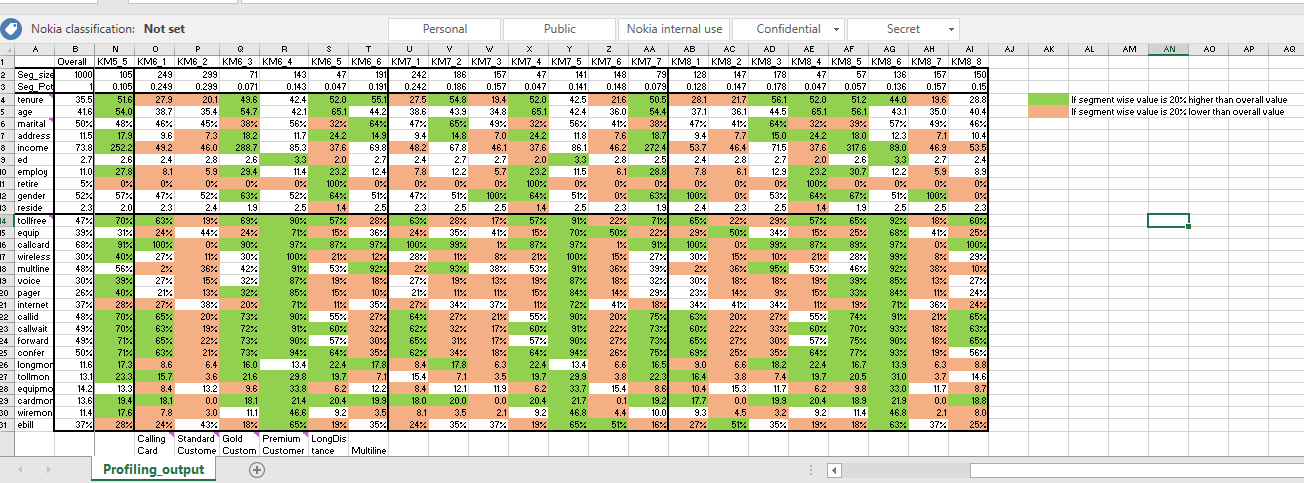

#### in above metrics, we can segment customers based on their usage and demographic data.

In [ ]:
new_cust = pd.read_csv('C:/Users/abgautam/Documents/Abhishek/Telco_new_cust.csv')

In [175]:
new_cust

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,1,38,55,1,12,135,2,24,0,0,4,1,0,1,0,1,1,1,1,1,1,1,1,12.15,31.75,0.00,16.25,0.00,1,4
1,3,59,26,1,3,41,4,1,0,1,3,0,1,1,1,1,0,0,1,0,0,0,0,12.65,0.00,35.10,46.75,29.15,0,2
2,2,54,55,0,1,587,3,33,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,13.00,0.00,0.00,0.00,0.00,0,3
3,3,9,40,0,13,38,4,7,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,3.35,21.00,42.40,17.50,59.55,1,4
4,1,67,67,1,38,49,2,10,0,1,2,0,1,1,0,1,0,0,1,0,0,0,0,14.30,0.00,29.25,25.25,0.00,1,2
5,2,24,44,0,19,33,3,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,1,4.65,0.00,26.65,0.00,0.00,1,1
6,2,12,55,1,13,36,1,5,0,1,2,0,1,0,0,1,0,0,1,0,0,0,0,5.95,0.00,26.55,0.00,0.00,0,2
7,1,26,47,0,13,54,3,0,0,0,1,1,1,1,1,1,1,0,1,0,0,0,1,7.10,16.00,38.50,18.00,23.50,1,2
8,2,3,32,0,4,58,2,11,0,0,4,1,1,1,1,1,1,1,0,0,0,1,0,2.75,15.75,29.50,9.25,28.55,1,4
9,2,20,46,0,2,23,5,4,0,1,2,0,0,0,0,1,1,0,1,1,1,1,0,4.75,0.00,0.00,0.00,0.00,1,4


In [176]:
new_cust.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,1,38,55,1,12,135,2,24,0,0,4,1,0,1,0,1,1,1,1,1,1,1,1,12.15,31.75,0.00,16.25,0.00,1,4
1,3,59,26,1,3,41,4,1,0,1,3,0,1,1,1,1,0,0,1,0,0,0,0,12.65,0.00,35.10,46.75,29.15,0,2
2,2,54,55,0,1,587,3,33,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,13.00,0.00,0.00,0.00,0.00,0,3
3,3,9,40,0,13,38,4,7,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,3.35,21.00,42.40,17.50,59.55,1,4
4,1,67,67,1,38,49,2,10,0,1,2,0,1,1,0,1,0,0,1,0,0,0,0,14.30,0.00,29.25,25.25,0.00,1,2


In [177]:
new_cust1 = new_cust.drop(['region', 'custcat'], axis=1)

In [178]:
new_cust1.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill
0,38,55,1,12,135,2,24,0,0,4,1,0,1,0,1,1,1,1,1,1,1,1,12.15,31.75,0.00,16.25,0.00,1
1,59,26,1,3,41,4,1,0,1,3,0,1,1,1,1,0,0,1,0,0,0,0,12.65,0.00,35.10,46.75,29.15,0
2,54,55,0,1,587,3,33,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,13.00,0.00,0.00,0.00,0.00,0
3,9,40,0,13,38,4,7,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,3.35,21.00,42.40,17.50,59.55,1
4,67,67,1,38,49,2,10,0,1,2,0,1,1,0,1,0,0,1,0,0,0,0,14.30,0.00,29.25,25.25,0.00,1


In [179]:
new_cust_scaled=sc.transform(new_cust1)

In [180]:
list_var = ['wiremon','tollmon','callcard','employ','tenure','multline','income','retire','gender','marital']

In [181]:
new_cust_scaled = pd.DataFrame(new_cust_scaled, columns=new_cust1.columns)

In [182]:
new_cust_scaled = new_cust_scaled[list_var]

In [183]:
new_cust_scaled.head()

,wiremon,tollmon,callcard,employ,tenure,multline,income,retire,gender,marital
0,-0.598794,1.179075,0.689149,1.309465,0.115883,1.051315,0.789634,-0.222076,-1.034598,1.010051
1,0.931920,-0.824695,0.689149,-0.998599,1.099530,1.051315,-0.422919,-0.222076,0.966559,1.010051
2,-0.598794,-0.824695,-1.451065,2.212621,0.865328,-0.951190,6.620209,-0.222076,-1.034598,-0.990050
3,2.528274,0.500633,0.689149,-0.396495,-1.242486,-0.951190,-0.461618,-0.222076,0.966559,-0.990050
4,-0.598794,-0.824695,0.689149,-0.095443,1.474252,1.051315,-0.319723,-0.222076,0.966559,1.010051


In [184]:
def kmeans_assignment(centroids, points):
    num_centroids, dim=centroids.shape
    num_points, _ = points.shape
    
    # Tile and reshape both arrays into `[num_points, num_centroids, dim]`.
    centroids = np.tile(centroids, [num_points,1]).reshape([num_points, num_centroids, dim])
    points = np.tile(points, [1, num_centroids]).reshape([num_points, num_centroids, dim])
    
    # Compute all distances (for all points and all centroids) at once and 
    # select the min centroid for each point.
    distances = np.sum(np.square(centroids - points), axis=2)
    return np.argmin(distances, axis=1)

In [185]:
centroids = km_6.cluster_centers_

In [186]:
points = new_cust_scaled

In [187]:
kmeans_assignment(centroids, points)

array([5, 5, 2, 3, 5, 1, 1, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 1, 0, 4, 3, 3,
       1, 1, 3, 2, 5, 2, 2, 3, 1, 1, 5, 5, 2, 0, 3, 0, 0, 0, 2, 3, 0, 3,
       3, 0, 0, 4, 0, 0, 1, 5, 3, 0, 5, 3, 0, 2, 3, 1, 1, 0, 0, 3, 3, 2,
       1, 0, 2, 2, 1, 0, 5, 1, 3, 3, 3, 0, 1, 0, 1, 1, 0, 3, 4, 5, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 3, 0, 0, 5, 1], dtype=int64)

In [188]:
new_cust['pred_segment'] = pd.Series(kmeans_assignment(centroids, points))

In [189]:
new_cust.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat,pred_segment
0,1,38,55,1,12,135,2,24,0,0,4,1,0,1,0,1,1,1,1,1,1,1,1,12.15,31.75,0.00,16.25,0.00,1,4,5
1,3,59,26,1,3,41,4,1,0,1,3,0,1,1,1,1,0,0,1,0,0,0,0,12.65,0.00,35.10,46.75,29.15,0,2,5
2,2,54,55,0,1,587,3,33,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,13.00,0.00,0.00,0.00,0.00,0,3,2
3,3,9,40,0,13,38,4,7,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,3.35,21.00,42.40,17.50,59.55,1,4,3
4,1,67,67,1,38,49,2,10,0,1,2,0,1,1,0,1,0,0,1,0,0,0,0,14.30,0.00,29.25,25.25,0.00,1,2,5


#### In above metrics, we can classify data into segments of cluster
    - We are taking cluster 6 as we found out using Silhouette Score and Profiling.

### Finding Optimal number of clusters (optional)

### Elbow Analysis 

In [190]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( telco_scaled2 )
    cluster_errors.append( clusters.inertia_ )

In [191]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,10000.000000
1,2,8190.374070
2,3,7325.375758
3,4,6441.192546
4,5,5735.937572
5,6,5195.776035
6,7,4891.802040
7,8,4620.338637
8,9,4434.454566
9,10,4250.862967


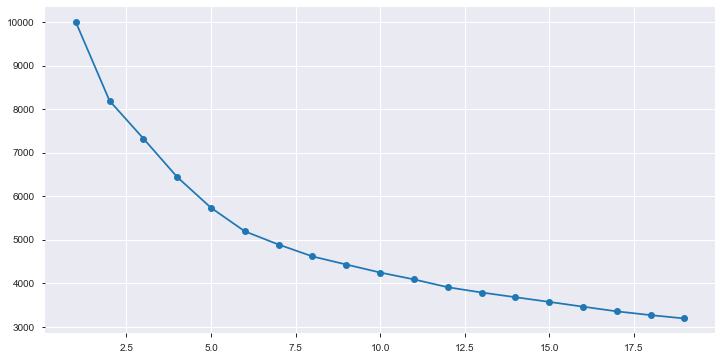

In [192]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5 to 6. So, optimal number of clusters could either 5 or 6. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.